# Лекция 3. Первичный анализ данных

 

Пример данных оттока клиентов компании оператора связи с github'а mlcourse

In [233]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/telecom_churn.csv")

In [169]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [170]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [171]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [172]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


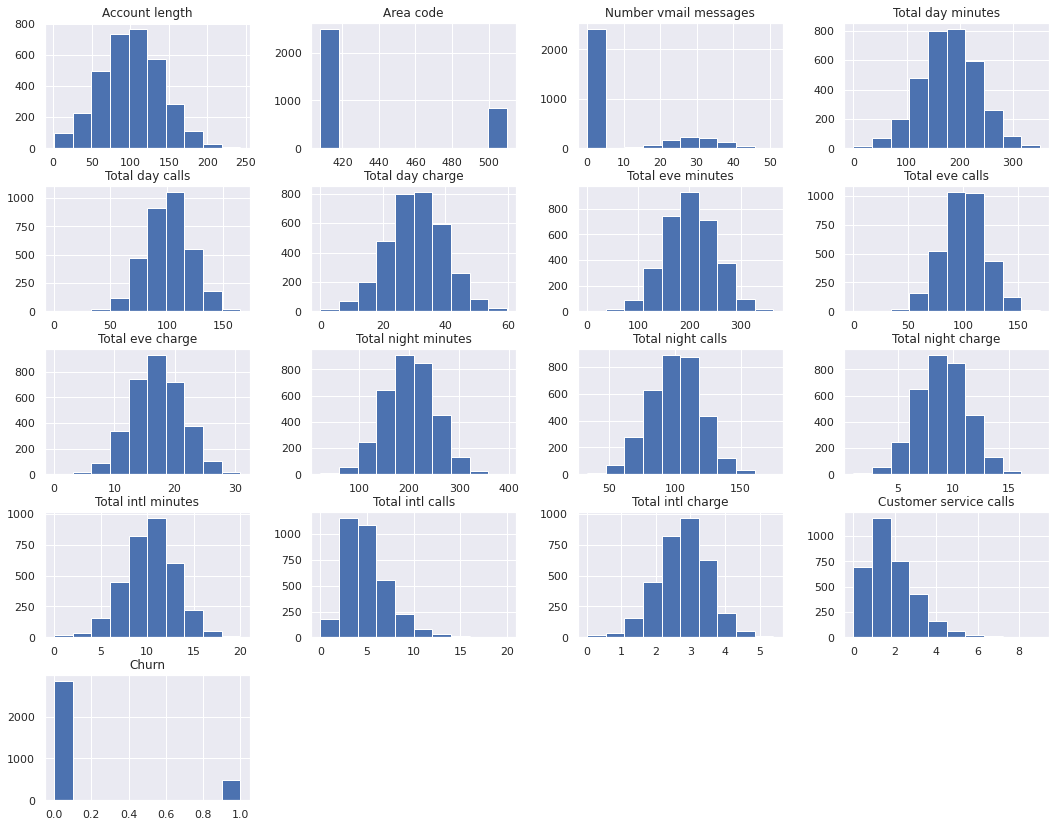

In [234]:
df.Churn = df.Churn.astype(np.uint8) # нужно для подсчета матрицы ковариации и гистограммы
df.hist(figsize = (18,14.3));

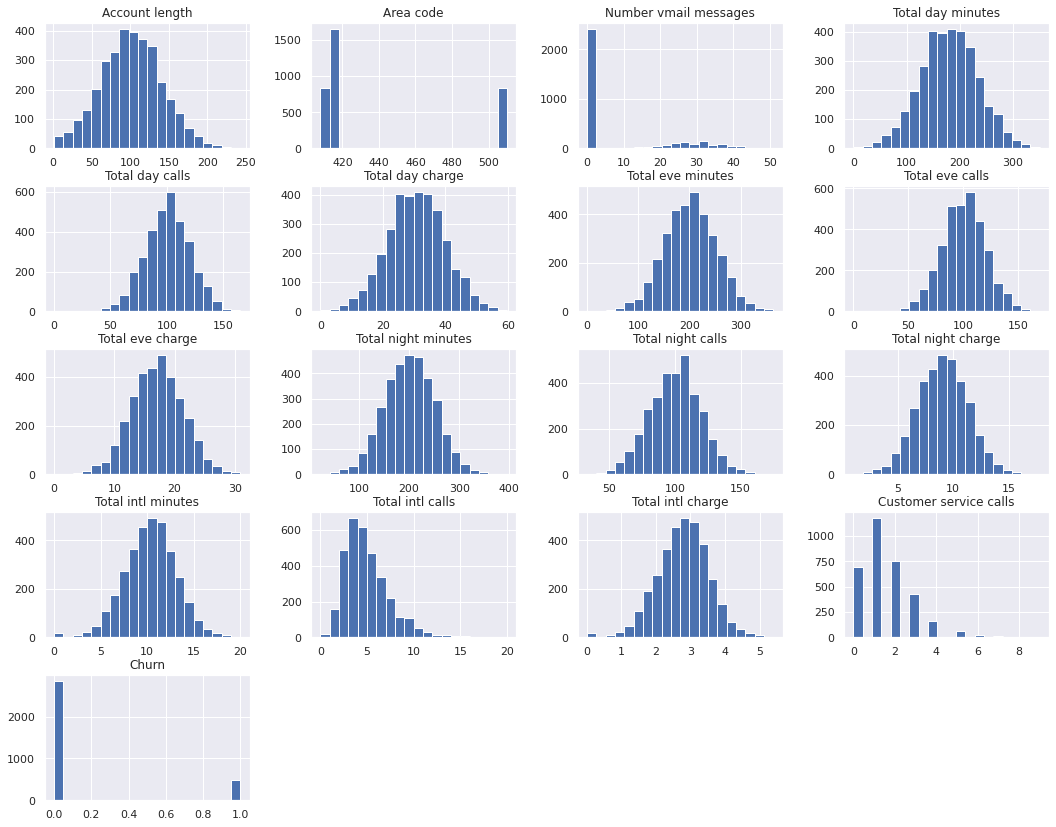

In [174]:
df[df.columns].hist(figsize =  (18,14.3), bins = 20);

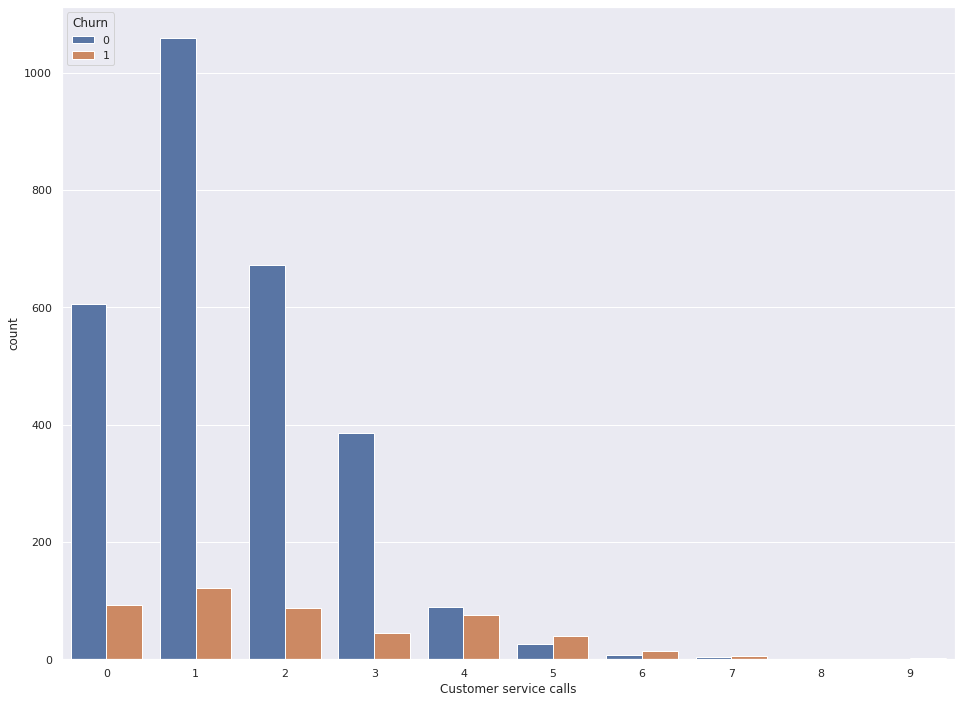

In [175]:
sns.countplot(data = df,x = 'Customer service calls',hue = 'Churn')

## Континуальные, количественные признаки
Признак, область определения $ \mathbb {D} $ которого является подмножество $ \mathbb {R} $ (еще иногда  $ \mathbb {N} $ если область достаточно большая), называют часто количественным\континуальным признаком.  
Его область определения может быть ограниченной, и неограниченной.  
Пусть у нас есть набор данных $ X $, представленный вектором, элементы которого обозначим $ x_i $ в данном наборе существует k признаков, из них $n$ континунальных признаков, тогда это можно записать так:
$$ \exists n < k : \forall i \in \overline{1,n}: x_i \subset \mathbb {R} $$

В данной таблице континуальными признаками будут:
```python
['Total day minutes',
'Total day calls', 'Total day charge', 'Total eve minutes',
'Total eve calls', 'Total eve charge', 'Total night minutes',
'Total night calls', 'Total night charge', 'Total intl minutes',
'Total intl calls', 'Total intl charge','Customer service calls', 'Number vmail messages']
```
Это можно увидеть как по их распределению, (на гистограммах), так и по логике:
> * Время звонков - непрерывное (континуальное) распределение значений. Можно сразу обратить внимание на тип - `float`
> * Стоимость скорее всего связана с временем звонков - соответсвенно также является количественным признаком. Тоже - `float`.
> * Число звонков хоть и является дискретной величиной, но из-за больших значений, а также из-за непрерывного изменения с шагом 1, можно считать их количественным признаком.
> * Число звонков в сервисную службу (`Customer service calls`), как видно из второго набора гистограмм считать количественной можно только с натяжкой. Как мы видим, их распределение явл-ся схожим с Бернулли.

Проверим предположение о связи стоимости с длительностью\числом звонков:


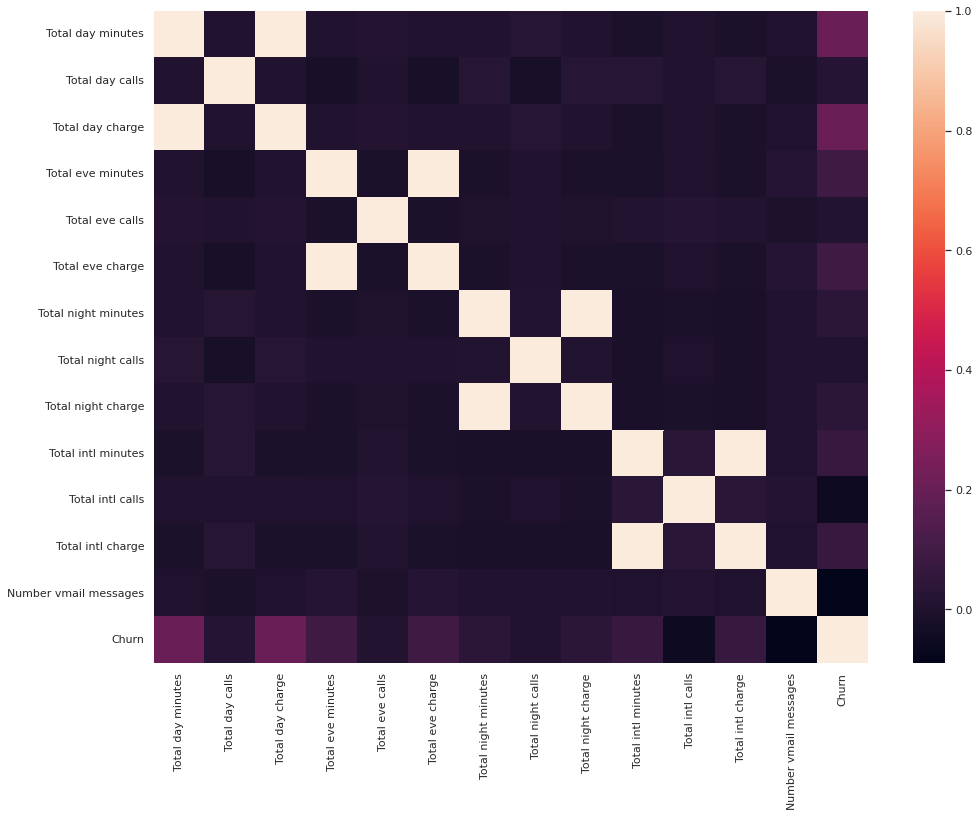

In [176]:
cont_feats = ['Total day minutes',
'Total day calls', 'Total day charge', 'Total eve minutes',
'Total eve calls', 'Total eve charge', 'Total night minutes',
'Total night calls', 'Total night charge', 'Total intl minutes',
'Total intl calls', 'Total intl charge', 'Number vmail messages']
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(df[[*cont_feats,"Churn"]].corr());

Как мы видим, все признаки, отвечающие за число минут, попарно линейно скоррелированы со суммарным чеком за тот же период. 

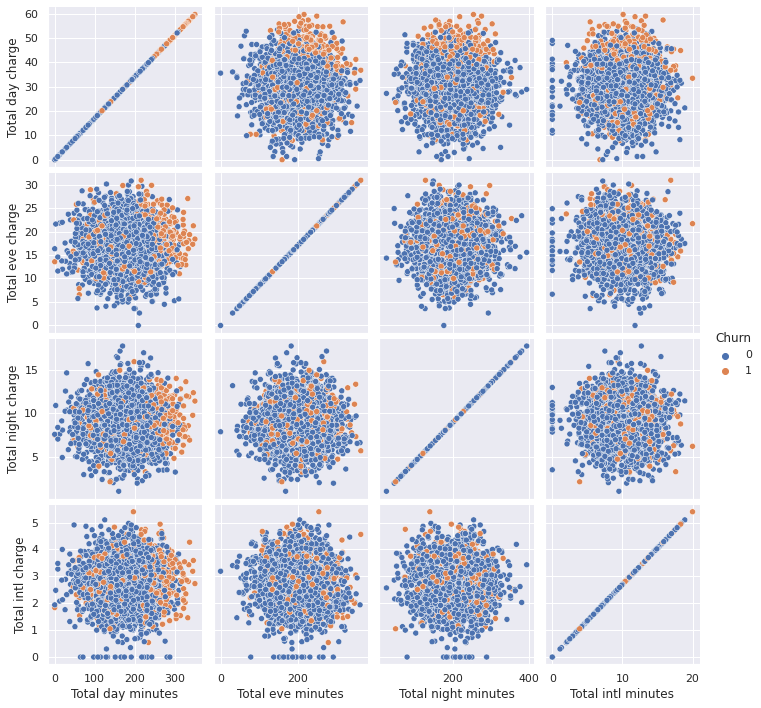

In [177]:
sns.pairplot(df[[*cont_feats, "Churn"]],
             x_vars = [x for x in cont_feats if 'minutes' in x],
             y_vars = [x for x in cont_feats if 'charge' in x], hue = "Churn");



## Дискретные, категориальные, бинарные признаки, _ordinal variables_
В данной таблице категоральными признаками будут:
```python
['Account length',
 'Area code',
 'Voice mail plan',
 'International plan',
 'State',
 'Churn']
```
Тут важно понимать, что ковариации по Пирсону впервую очередь имеют смысл только для пар количественный признак - количественный признак и категориальный - количественный. 
Для пар категориальный-категориальный признаков существуют свои критерии ковариации. 
Обычно имеют ф.р. подобные  распределениям Бернули, Пуассона или биномиальному. (В нашем случае биномиальное).




In [178]:
cat_feats = [*(set(df.columns) - set(cont_feats))]
cat_feats

['Churn',
 'International plan',
 'Account length',
 'Customer service calls',
 'Voice mail plan',
 'State',
 'Area code']

Предварительно, нужно обработать текстовые поля.

In [239]:
df[cat_feats]
df['International plan'] = df['International plan'].map(lambda x: {"No":0, "Yes":1}[x])
df['Voice mail plan'] = df['Voice mail plan'].map(lambda x: {"No":0, "Yes":1}[x])
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


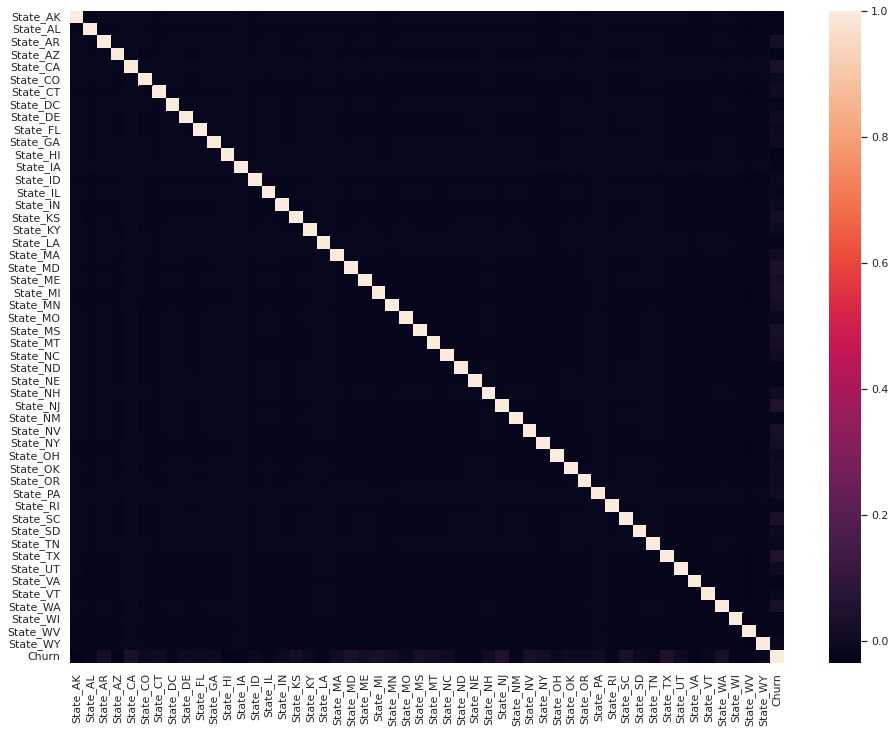

In [180]:
# Разреженное представление категоральной переменной:
states_df = pd.get_dummies(df[['State']])
sns.heatmap(df.join(states_df)[[ *states_df.columns, "Churn",]].corr());

In [205]:
pd.get_dummies(df[['State']])

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3330,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3331,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [181]:
df.join(states_df)[[ *states_df.columns, "Churn",]].corr().iloc[-1][:-1]

State_AK   -0.031194
State_AL   -0.020009
State_AR    0.020270
State_AZ   -0.032759
State_CA    0.034547
State_CO   -0.003453
State_CT    0.007383
State_DC   -0.019074
State_DE    0.001019
State_FL   -0.007070
State_GA    0.001179
State_HI   -0.031890
State_IA   -0.025212
State_ID   -0.009194
State_IL   -0.022194
State_IN   -0.007608
State_KS    0.016976
State_KY   -0.003555
State_LA   -0.023543
State_MA    0.009742
State_MD    0.040752
State_ME    0.025329
State_MI    0.031570
State_MN    0.015374
State_MO   -0.013329
State_MS    0.028233
State_MT    0.024995
State_NC    0.006908
State_ND   -0.018828
State_NE   -0.024416
State_NH    0.005867
State_NJ    0.049111
State_NM   -0.018828
State_NV    0.027136
State_NY    0.016256
State_OH   -0.007348
State_OK    0.001019
State_OR   -0.001710
State_PA    0.010922
State_RI   -0.021076
State_SC    0.034008
State_SD   -0.004454
State_TN   -0.018263
State_TX    0.044358
State_UT   -0.002543
State_VA   -0.034940
State_VT   -0.015017
State_WA    0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



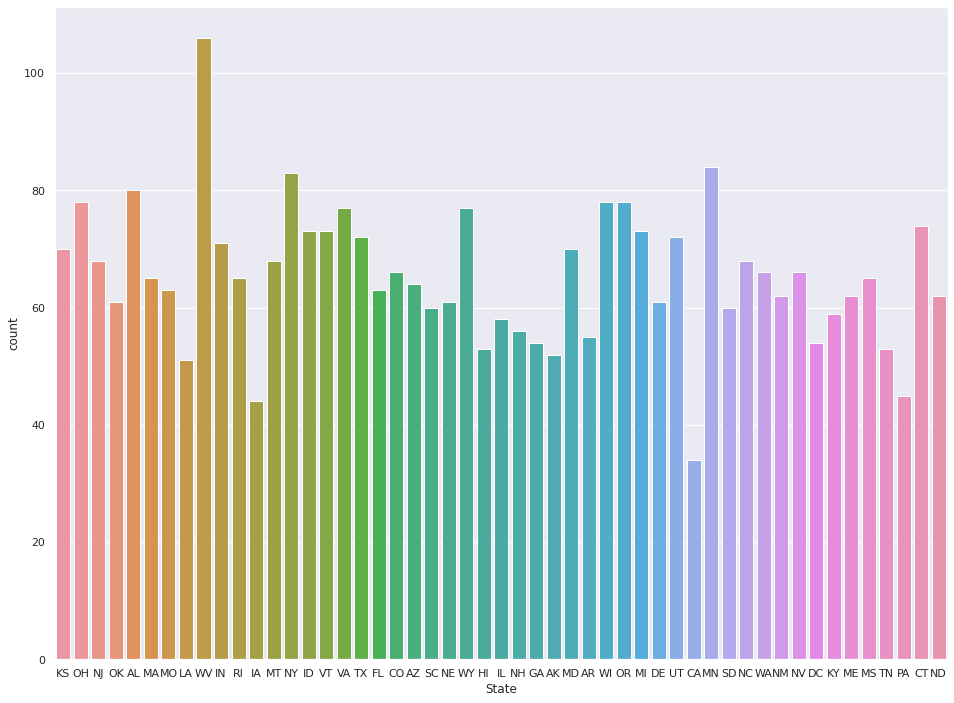

In [235]:
sns.countplot(df['State']);

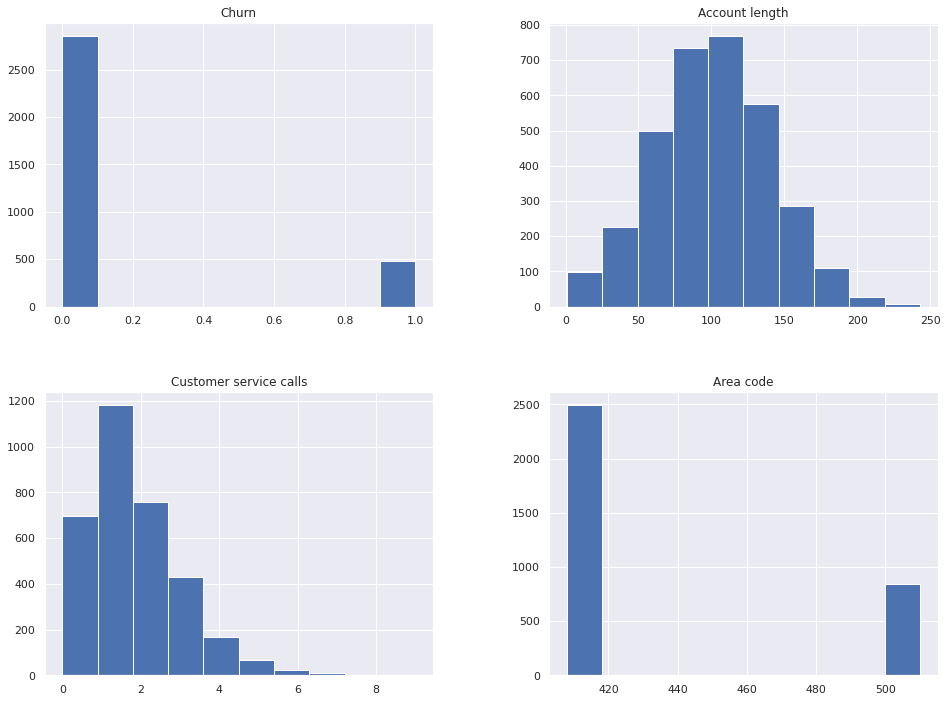

In [236]:
df.Churn = df.Churn.astype(np.uint8)
df[cat_feats].hist();

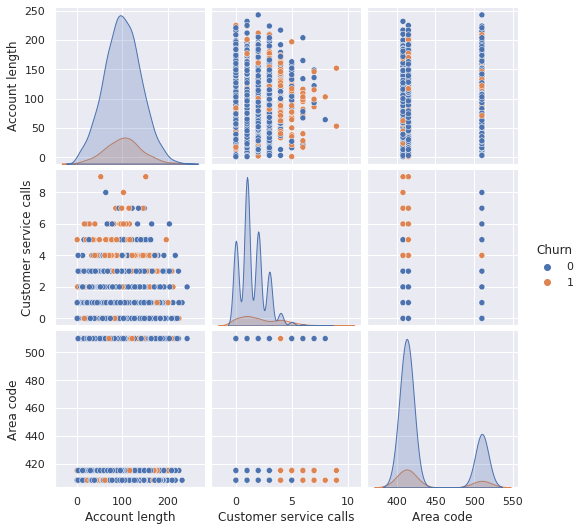

In [237]:
sns.pairplot(df[cat_feats], hue = 'Churn');

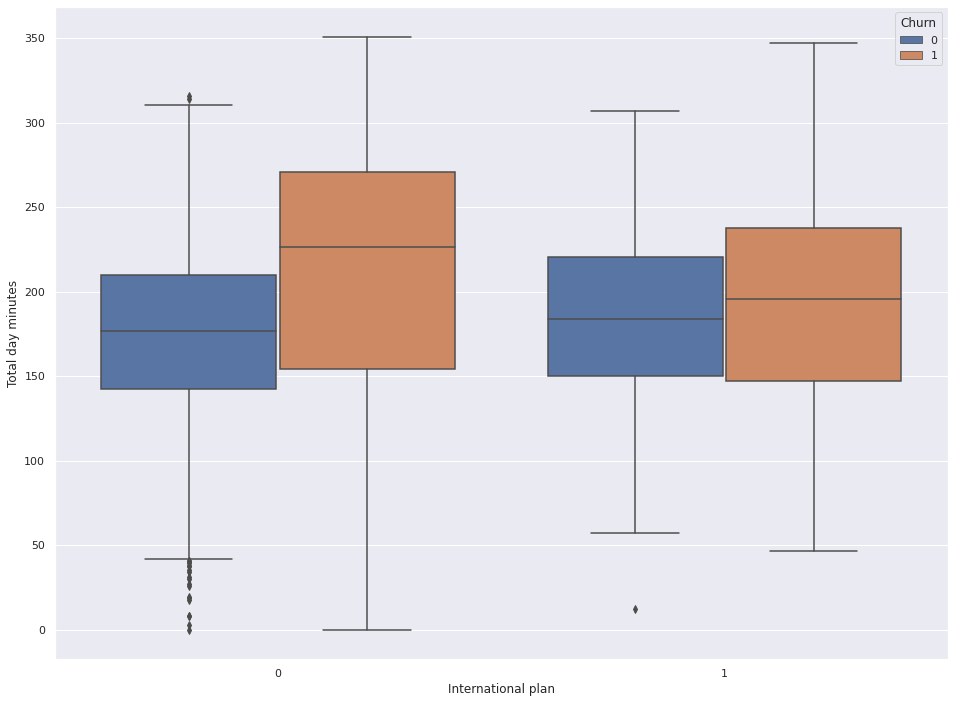

In [185]:
sns.boxplot(x=df['International plan'], y=df['Total day minutes'], hue = df.Churn);

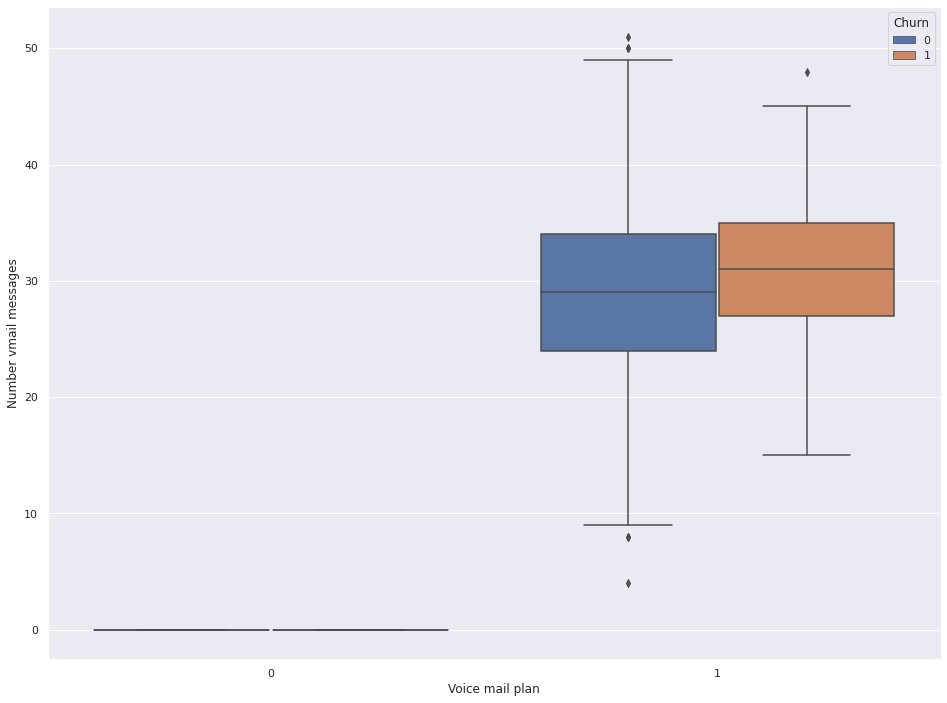

In [186]:
sns.boxplot(x=df['Voice mail plan'], y=df['Number vmail messages'], hue = df.Churn);

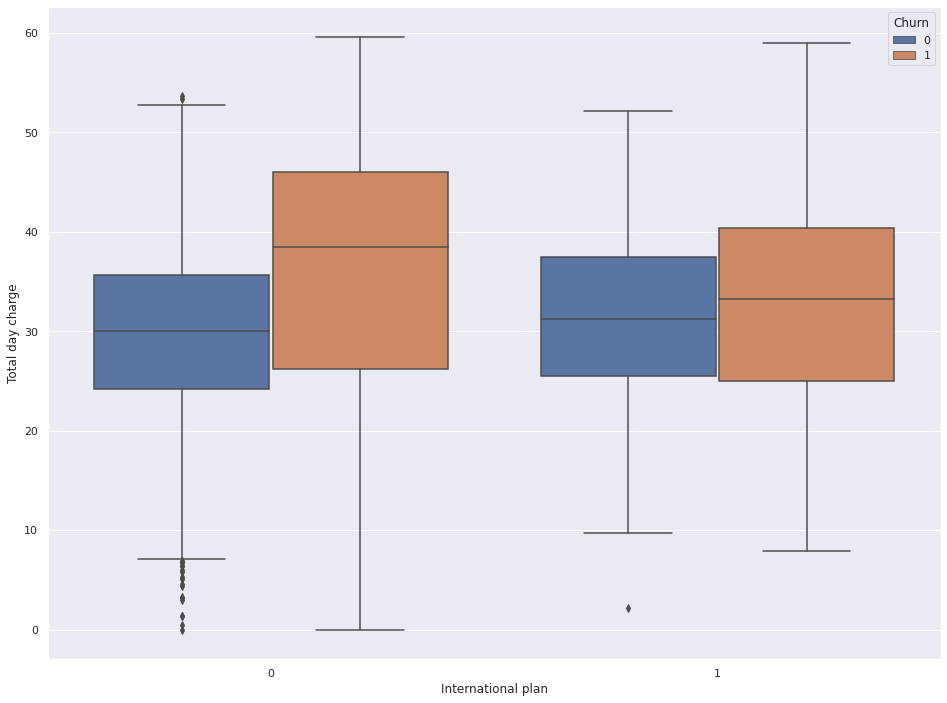

In [187]:
sns.boxplot(x=df['International plan'], y=df['Total day charge'], hue = df.Churn);

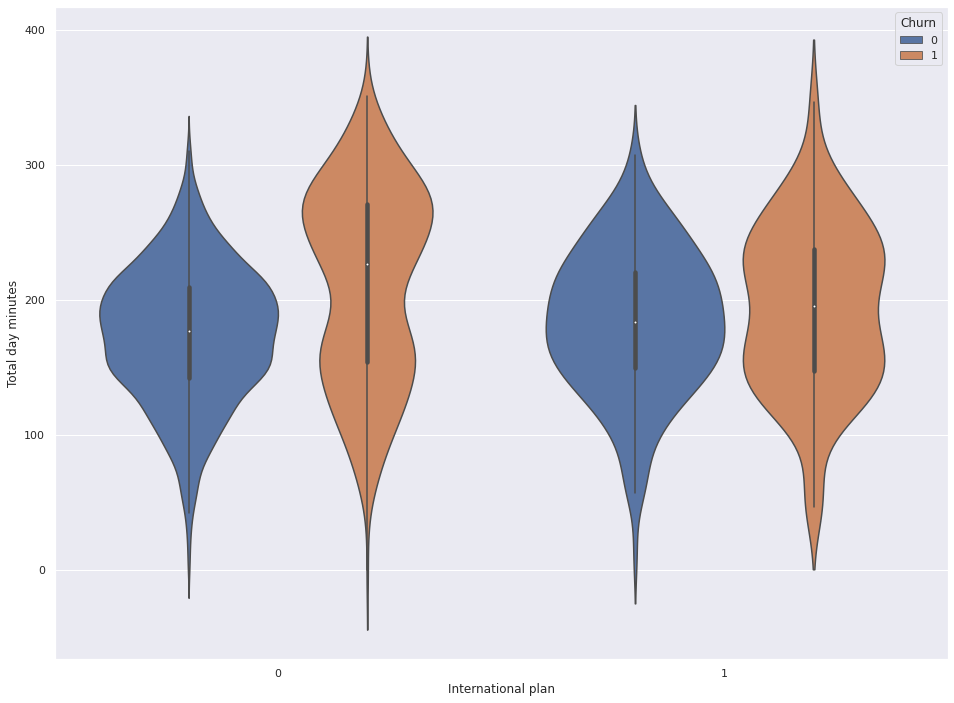

In [188]:
sns.violinplot(x=df['International plan'], y=df['Total day minutes'], hue = df.Churn);

## Создание дополнительных признаков

In [189]:
import sklearn

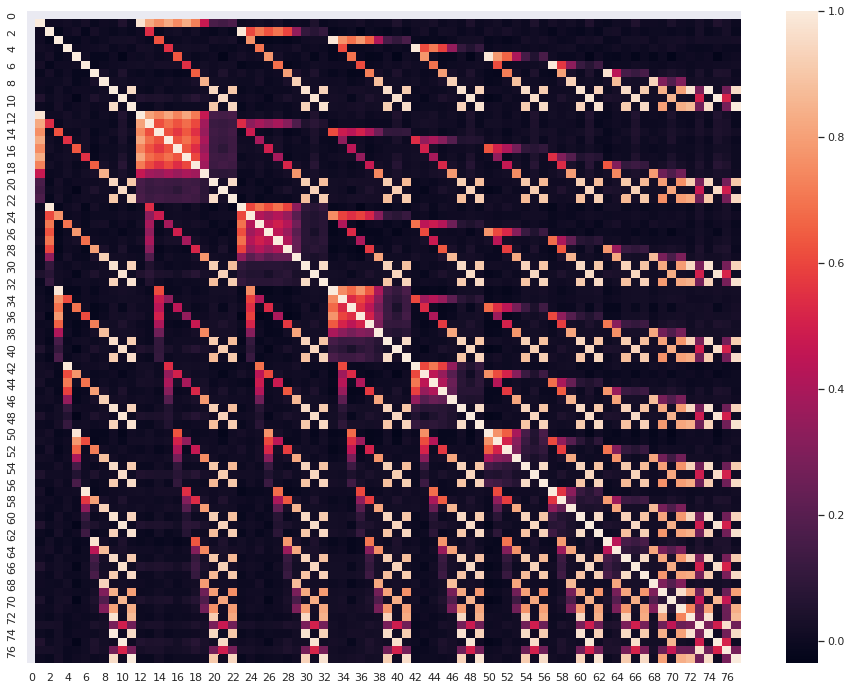

In [240]:
poly_trm = sklearn.preprocessing.PolynomialFeatures(degree=2)

poly_feats = poly_trm .fit_transform(df[[x for x in cont_feats + ['International plan', 'Voice mail plan'] if 'charge' not in x]].values)
sns.heatmap(pd.DataFrame(poly_feats).corr());

$x_i, x_i *x_j : i!=j$

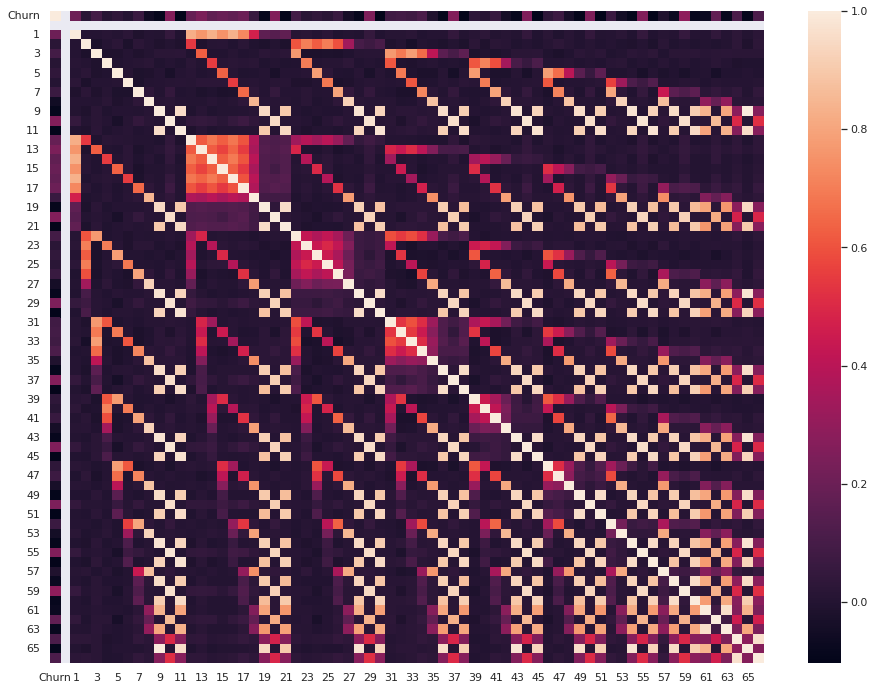

In [241]:
poly_trm = sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=True)
poly_feats = poly_trm .fit_transform(df[[x for x in (cont_feats+ ['International plan', 'Voice mail plan'] ) if 'charge' not in x]].values)
sns.heatmap((df[['Churn']].join(pd.DataFrame(poly_feats))).corr());

In [242]:
(df[['Churn']].join(pd.DataFrame(poly_feats))).corr()

,Churn,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
Churn,1.000000,NaN,0.205151,0.018459,0.092796,0.009233,0.035493,0.006141,0.068239,-0.052844,-0.089728,0.259852,-0.102148,0.185508,0.245071,0.171647,0.192239,0.174538,0.201154,0.061389,-0.087652,0.258935,-0.098884,0.090574,0.018125,0.038971,0.017085,0.063438,-0.041974,-0.085908,0.246581,-0.097791,0.082192,0.093660,0.080306,0.114109,-0.012044,-0.087066,0.260741,-0.098172,0.032347,0.010924,0.057870,-0.041689,-0.086213,0.251242,-0.097917,0.030885,0.070541,-0.033282,-0.091988,0.246806,-0.103707,0.065922,-0.047378,-0.086598,0.255111,-0.097586,-0.012863,-0.073203,0.292497,-0.084284,-0.073169,0.173804,-0.081672,0.114255,-0.089728,0.117928
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.205151,NaN,1.000000,0.006750,0.007043,0.015769,0.004323,0.022972,-0.010155,0.008033,0.000778,0.049396,-0.001684,0.825325,0.759974,0.829361,0.752022,0.831942,0.726023,0.472570,0.163609,0.145332,0.167995,0.008709,0.017560,0.005368,0.023557,-0.005473,0.001146,-0.002076,0.047489,-0.004470,0.012068,0.009232,0.020847,-0.002835,0.005571,0.005855,0.045987,0.002698,0.016275,0.027322,-0.000228,0.011554,-0.000148,0.044467,-0.002800,0.017028,-0.005200,0.014453,-0.001133,0.046825,-0.000232,0.005569,0.019329,-0.000236,0.050079,-0.002526,0.009338,0.005030,0.052079,0.004841,0.004123,0.040974,0.004972,0.025788,0.000778,0.025536
2,0.018459,NaN,0.006750,1.000000,-0.021451,0.006462,0.022938,-0.019557,0.021565,0.004574,-0.009548,0.003755,-0.011086,0.541328,-0.009485,0.011141,0.016929,-0.001787,0.017438,-0.004822,-0.013179,0.002506,-0.014613,0.604506,0.704866,0.623714,0.699155,0.596416,0.336754,0.102663,0.073635,0.105769,-0.010704,0.003044,-0.032202,0.000806,-0.008342,-0.017209,-0.000164,-0.017146,0.024067,-0.009989,0.018941,0.014016,-0.005868,0.005676,-0.006110,0.009124,0.029228,0.012311,-0.001949,0.009905,-0.003329,0.008251,-0.005503,-0.012038,0.004477,-0.013610,0.021127,-0.005089,0.004961,-0.006924,0.003893,-0.005291,0.002448,0.027383,-0.009548,0.026003
3,0.092796,NaN,0.007043,-0.021451,1.000000,-0.011430,-0.012584,0.007586,-0.011035,0.002541,0.017562,0.019100,0.021545,-0.006805,0.627243,-0.003694,-0.001284,0.011433,-0.002326,0.000378,0.022657,0.016279,0.025486,0.768274,-0.021070,-0.020892,-0.013482,-0.021510,-0.007900,0.010634,0.015582,0.015702,0.767503,0.690922,0.782488,0.659184,0.412793,0.156083,0.103629,0.165779,-0.014476,-0.007698,-0.013919,-0.002370,0.018564,0.017212,0.021673,-0.006827,-0.018110,-0.004507,0.021843,0.010124,0.024387,-0.005815,0.000040,0.022506,0.015679,0.027644,-0.003870,0.017541,0.017978,0.021408,0.015666,0.019468,0.022204,0.020972,0.017562,0.017286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.173804,NaN,0.040974,-0.005291,0.019468,0.021218,-0.033112,0.011454,0.045520,0.185655,0.016801,0.857736,0.013120,0.028762,0.040729,0.041098,0.010489,0.040400,0.066640,0.177345,0.022991,0.816163,0.019903,0.007483,0.013055,-0.026937,0.005915,0.034216,0.163990,0.023120,0.832154,0.019653,0.028470,-0.011716,0.018720,0.048896,0.180650,0.018548,0.830077,0.014490,-0.012428,0.020009,0.052636,0.186560,0.016930,0.852990,0.014568,-0.018787,0.008774,0.137470,0.010468,0.819008,0.007195,0.043795,0.175662,0.016508,0.841258,0.013155,0.195135,0.033818,0.834066,0.031083,0.083609,1.000000,0.083043,0.451955,0.016801,0.462910
63,-0.081672,NaN,0.004972,0.002448,0.022204,0.004960,-0.001904,0.005852,0.025105,0.303958,0.805660,0.016808

## Снижение размерности
Пример работы t-sne из [статьи](https://www.jmlr.org/papers/v9/vandermaaten08a.html)
![](https://drive.google.com/uc?export=view&id=1TQYN1EdiFmpr_M8xiYLXEeiz1E3RYhIL)


PAC - метод главных компонент (англ. principal component analysis)
![](https://wiki.loginom.ru/images/pca.svg)
[Понятная статья про PAC](https://habr.com/ru/post/304214/)

Еще один метод [Umap](https://arxiv.org/abs/1802.03426)





In [207]:
from sklearn.manifold import TSNE

In [208]:
df[cont_feats + [x for x in cat_feats if x not in ['State', "Area code","Account length" ]]].values

array([[265.1 , 110.  ,  45.07, ...,   0.  ,   1.  ,   1.  ],
       [161.6 , 123.  ,  27.47, ...,   0.  ,   1.  ,   1.  ],
       [243.4 , 114.  ,  41.38, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [180.8 , 109.  ,  30.74, ...,   0.  ,   2.  ,   0.  ],
       [213.8 , 105.  ,  36.35, ...,   1.  ,   2.  ,   0.  ],
       [234.4 , 113.  ,  39.85, ...,   0.  ,   0.  ,   1.  ]])

In [209]:
# https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf
tsne = TSNE(random_state=123)
tsne.fit(X = df[cont_feats + [x for x in cat_feats if x not in ['State', "Area code","Account length" ]]].values)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=123, verbose=0)

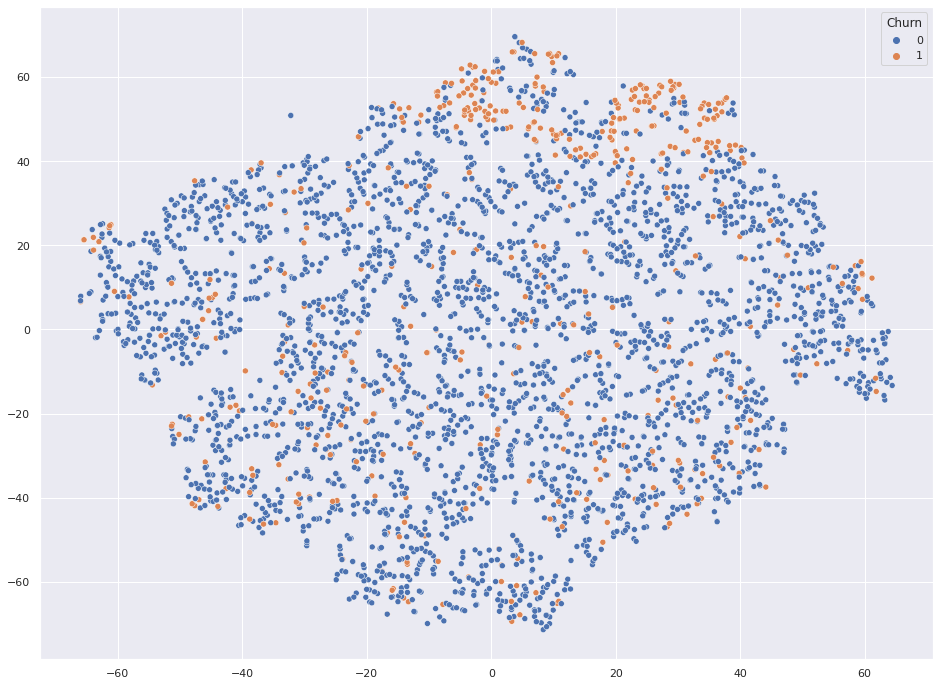

In [210]:
sns.scatterplot(x = tsne.embedding_[:,0],y = tsne.embedding_[:,1], hue = df.Churn);

In [211]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

In [212]:
# colors = {False: 'blue', True:'green'}
fig = px.scatter(x = tsne.embedding_[:,0],y = tsne.embedding_[:,1], color=df.Churn)
fig.show(renderer="colab")

In [204]:
# Задание: построить embedding карту с Umap
# !pip install umap
# import umap
# reducer = umap.UMAP()


![](https://drive.google.com/file/d/1TQYN1EdiFmpr_M8xiYLXEeiz1E3RYhIL/view?usp=sharing)


In [111]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
fig = px.scatter_matrix(df, dimensions=features, color="species")
fig.show(renderer="colab")

In [112]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [113]:

corr = df.corr()

trace = go.Heatmap(z=corr.values,
                  x=corr.index.values,
                  y=corr.columns.values
                   )
data=[trace]
fig = go.Figure(data)

fig.show(renderer = 'colab')

In [114]:
corr 

,sepal_length,sepal_width,petal_length,petal_width,species_id
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species_id,0.782561,-0.419446,0.949043,0.956464,1.000000


In [214]:
df = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlcourse_open_first_survey_data.csv')

In [215]:
[print(i, x) for i,x in enumerate(df.columns)];

0 Timestamp
1 Представьтесь в 2-3 фразах
2 Работали ли Вы с Jupyter notebooks?
3 Что Вы ждете от курса?
4 Главное: что бы Вы добавили в программу курса? (нейронные сети, NLP, временные ряды, байесовский подход и т.д.) Предварительная программа доступна в slack OpenDataScience в канале #mlcourse_open
5 Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?
6 Ладно, посерьезней: согласны ли Вы на обработку персональных данных?
7 Какой из будних дней устроит? Воскресенье – 100%
8 Как думаете, Вам хватит мотивации пройти весь курс?
9 Собираетесь ли Вы поработать над индивидуальным проектом (это ~ 2 месяца, самая полезная часть)?
10 Хотели бы Вы видеть общий рейтинг слушателей?
11 Поддерживаете ли Вы идею, что вживую приходят топ-100 лучших по результатам прошлой домашки? Остальные смотрят трансляцию
12 Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)
13 Чему равна дисперсия равномерного на [0,6] распределения?
14 На

In [216]:
df[df.columns[13]].unique()

array(['3', '0.5', '0.03', nan, '0', '2', '13', '1/7',
       'ВЫ ЧООООООООООООООООООООООООООООООООООООООООООООООООООООО', '4',
       '1', 'моя не знать как решить', 'не хватает данных?:(',
       'Хех, не помню', '42', '0,6', '4.666667', '0,3',
       'Не знаю, надо гуглить', 'не знаю', '6',
       'Восстанавливаю навыки математики', 'затрудняюсь ответить', '1/6',
       '0,36', 'na', 'Нужно 2 дня, чтобы в этом разобраться!', '2,25',
       'нужно гуглить', 'Я не знаю,  1/6 ?', '=(', '?', '12,25',
       'Не знаю', '4.66', '1.6', "don't know", 'что такое дисперсия?',
       '4  нагуглил', '0,0396', 'хз',
       'я курс от мфти и яндекса проходил да еще не до конца прошел, но знаю, что квадратный корень дисперсии(то есть сигма) эт среднеквадратичное отклонение, а оно вроде как равно 3'],
      dtype=object)

In [217]:
(df[df.columns[13]] =='3').astype(np.uint8).sum()

588

Тут мы будем с помощью регулярного выражения вычленять числа

In [219]:
(df[df.columns[13]] \
 .str.extract('(\d+)') \
 .fillna(-1)[0] \
 .apply(float) == 3.0) \
.astype(np.uint8).sum()

589

In [120]:
df[df.columns[7]].unique()

array(['Любой', 'Пт', 'Вт', 'Чт', 'Ср', 'Пн'], dtype=object)

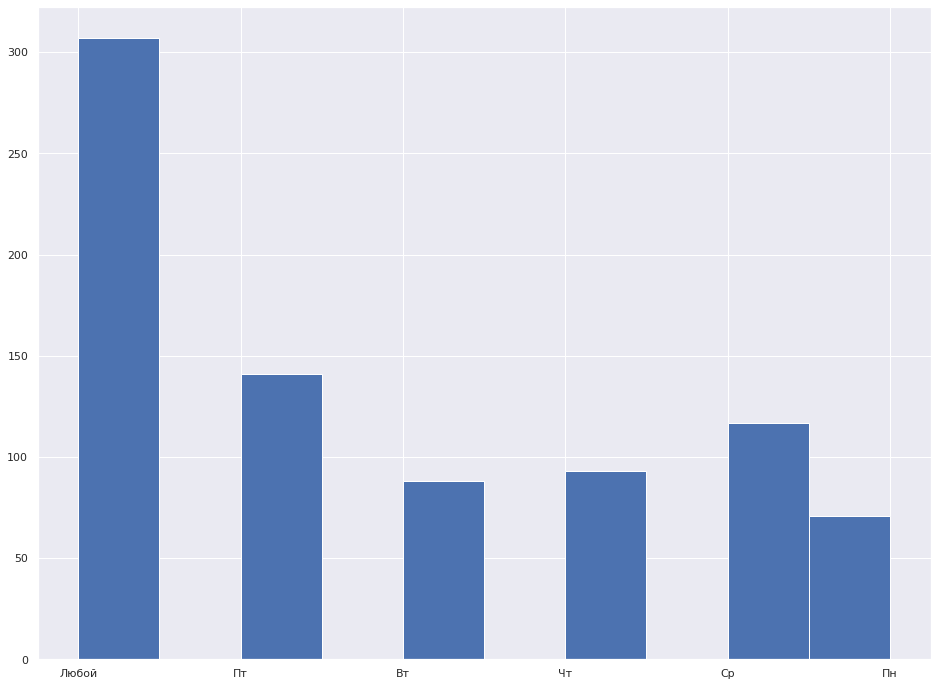

In [121]:
df[df.columns[7]].hist();

In [220]:
sports = df[df.columns[5]]
sports = sports[sports==sports]
sports.head()

0     Starcraft
2    basketball
4        футбол
5        Теннис
6           MMA
Name: Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?, dtype: object

In [222]:
sports.str.lower().value_counts().head()

футбол       100
плавание      32
баскетбол     29
хоккей        26
бег           25
Name: Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?, dtype: int64

In [124]:
sports.str.lower().value_counts().tail()

роллерспорт                                                    1
какая-нибудь компьютерная игра (вроде доты или кс), футбол.    1
заполнять опросники                                            1
литрбол                                                        1
регби                                                          1
Name: Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?, dtype: int64

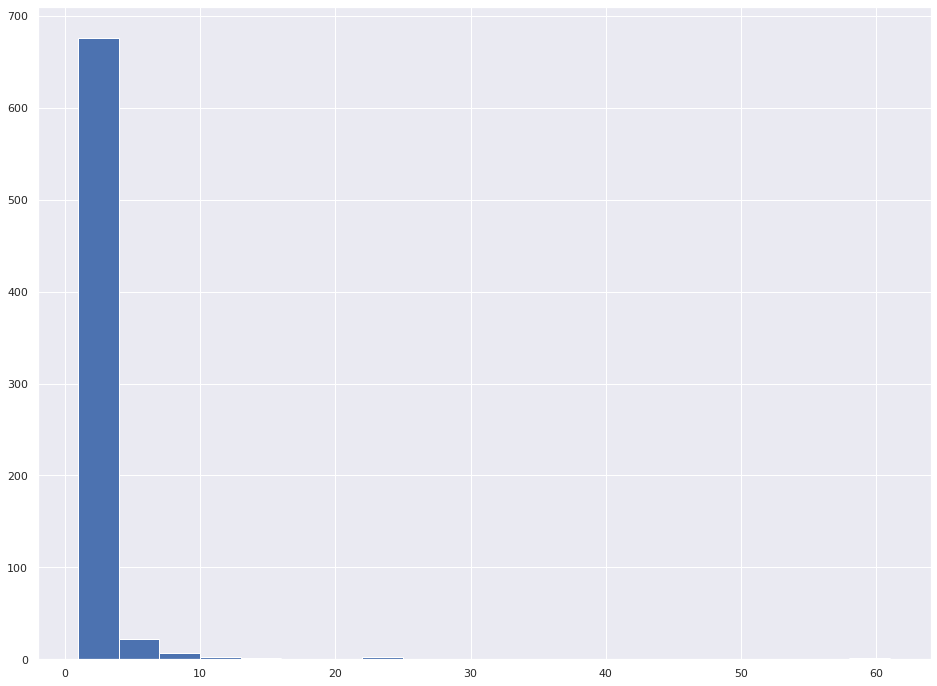

In [125]:
sports.str.lower().str.split(' ').apply(len).hist(bins = 20);

In [223]:
df_sports = sports.str.lower().str.extract('(\w{3,20})\W?(\w{3,20})?')
df_sports.columns = ['fw','sw']
df_sports.fw.unique(), df_sports.sw.unique()

(array(['starcraft', 'basketball', 'футбол', 'теннис', 'mma',
        'parrotdancing', 'бег', 'сноубординг', 'ориентирование', 'dota',
        'шахматы', 'хах', 'волейбол', 'фигурное', 'биатлон', 'батл',
        'mountain', 'велоспорт', 'сквош', 'lacrosse', 'сноуборд',
        'баскетбол', 'фрифлай', 'formula', 'хоккей', 'слежу', nan, 'лижи',
        'формула', 'стесняюсь', 'литробол', 'wineball', 'велосипед',
        'горнолыжный', 'фехтование', 'киберспорт', 'бокс', 'бейсбол',
        'бобслей', 'тяжелая', 'триатлон', 'ходьба', 'тяжёлая', 'легкая',
        'олимпиадное', 'велосипедный', 'смешанные', 'тайский',
        'настольный', 'extreme', 'counter', 'беговые', 'горные',
        'программирование', 'плавание', 'пинг', 'нет', 'прокрастинация',
        'спортивная', 'какой', 'смотреть', 'pyton', 'алтимат', 'бадминтон',
        'герои', 'сноркеллинг', 'спорт', 'бальные', 'дота2', 'pilates',
        'женское', 'академическая', 'картинг', 'капоэйра', 'гимнастика',
        'йога', 'авиа

In [226]:
import re
help(re)

Help on module re:

NAME
    re - Support for regular expressions (RE).

MODULE REFERENCE
    https://docs.python.org/3.7/library/re
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides regular expression matching operations similar to
    those found in Perl.  It supports both 8-bit and Unicode strings; both
    the pattern and the strings being processed can contain null bytes and
    characters outside the US ASCII range.
    
    Regular expressions can contain both special and ordinary characters.
    Most ordinary characters, like "A", "a", or "0", are the simplest
    regular expressions; they simply match themselves.  You can
    concatenate ordinary characters, so last mat

In [127]:
sports.str.lower().str.extract('([a-z]{3,20})')[0].unique()

array(['starcraft', 'basketball', nan, 'mma', 'parrotdancing', 'dota',
       'mountain', 'lacrosse', 'formula', 'wineball', 'trollface',
       'civilization', 'extreme', 'counter', 'slow', 'pyton', 'pilates',
       'moto', 'matplotlib', 'kaggle', 'freefly', 'skiing', 'crossfit',
       'paintball', 'gym', 'formala', 'poker', 'snowboard', 'hearthstone',
       'lol', 'snooker', 'muay', 'snowboarding', 'parrot', 'biking',
       'vollyball', 'dirt', 'soccer', 'aerobics', 'fitness', 'football',
       'climbing'], dtype=object)

In [128]:
sports.str.lower().str.extract('([a-z]{3,20})?\W?([a-z]{3,20})?')[0].unique(), \
sports.str.lower().str.extract('([a-z]{3,20})?\W?([a-z]{3,20})?')[1].unique()

(array(['starcraft', 'basketball', nan, 'mma', 'dota', 'mountain',
        'lacrosse', 'formula', 'wineball', 'extreme', 'counter', 'pilates',
        'matplotlib', 'kaggle', 'freefly', 'skiing', 'crossfit',
        'paintball', 'gym', 'formala', 'poker', 'snowboard', 'hearthstone',
        'lol', 'snooker', 'muay', 'snowboarding', 'biking', 'vollyball',
        'dirt', 'soccer', 'aerobics', 'fitness', 'football', 'climbing'],
       dtype=object),
 array([nan, 'parrotdancing', 'bike', 'ironing', 'strike', 'pyton', 'thai',
        'jumping'], dtype=object))

In [129]:
sports.str.lower().str.extract('(([a-z]{3,20})?\W?([a-z]{3,20})?(\d+)?)')[0].unique()

array(['starcraft', 'basketball', '', 'mma', 'starcraft 2',
       ':parrotdancing', 'dota', 'dota ', 'mountain bike', 'lacrosse',
       'formula 1', 'wineball ', 'extreme ironing', 'counter-strike',
       ' pyton', 'pilates;', 'matplotlib', 'kaggle', 'freefly',
       'starcraft ', 'skiing', 'crossfit', 'paintball', 'gym', '*',
       'formala-1', 'poker', 'snowboard', '?', 'hearthstone', 'lol',
       'snooker', 'muay thai', 'dota)', '\\', 'snowboarding', ')',
       'biking', 'vollyball', 'dirt jumping', ' ', 'soccer', 'aerobics',
       'fitness', 'football', 'climbing'], dtype=object)

In [228]:
sports.str.lower().str.replace('.','').str.split('\s')

0             [starcraft]
2            [basketball]
4                [футбол]
5                [теннис]
6                   [mma]
              ...        
811            [сноуборд]
812        [скалолазание]
813    [легкая, атлетика]
814          [фехтование]
816     [большой, теннис]
Name: Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?, Length: 711, dtype: object

In [229]:
sport_set = set()

[sport_set.add(x) if not hasattr(x, '__len__') and isinstance(x,str)  else [sport_set.add(y) for y in x] for x in sports.str.lower().str.split(' ').values]
[*sport_set][:10]

['',
 'дота,',
 'литробол.',
 '(хотя',
 'же?',
 '*',
 'роллерспорт',
 'беговые',
 'футбол)',
 'нет']

In [132]:
sports.str.lower().str.replace('.','').value_counts().head()

футбол       102
плавание      32
баскетбол     30
бег           26
хоккей        26
Name: Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?, dtype: int64

In [231]:
temp = sports.map({'football':'футболл'}) 
temp [temp==temp]

681    футболл
694    футболл
761    футболл
Name: Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?, dtype: object

In [133]:
sports.str.lower().str.replace('.','').str.split(' ')

0             [starcraft]
2            [basketball]
4                [футбол]
5                [теннис]
6                   [mma]
              ...        
811            [сноуборд]
812        [скалолазание]
813    [легкая, атлетика]
814          [фехтование]
816     [большой, теннис]
Name: Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?, Length: 711, dtype: object